✅ File found: ../data/superstore_cleaned.csv

✅ Dataset loaded successfully!
Shape: (9994, 25)

🔹 Columns in dataset:
['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'postal_code', 'region', 'product_id', 'category', 'sub-category', 'product_name', 'sales', 'quantity', 'discount', 'profit', 'profit_margin', 'cost', 'year', 'month']


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,sub-category,product_name,sales,quantity,discount,profit,profit_margin,cost,year,month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600,220.0464,2016,November
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000,512.3580,2016,November
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700,7.7486,2016,June
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000,1340.6085,2015,October
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125,19.8516,2015,October



✅ Using columns:
   Sales   -> sales
   Profit  -> profit
   Category -> category
   Region   -> region
   Sub-Category -> sub-category

🔹 BUSINESS OVERVIEW 🔹
Total Sales: $2,297,201
Total Profit: $286,397
Average Profit Margin: 12.47%
Top Performing Category: Technology
Top Performing Region: West


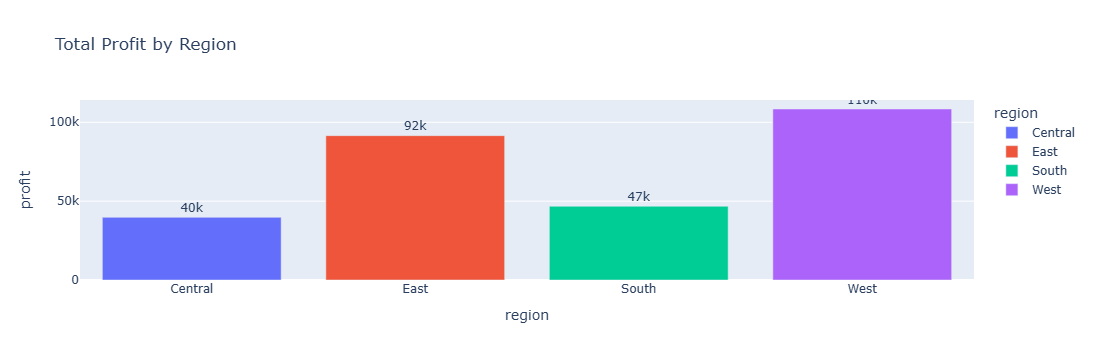

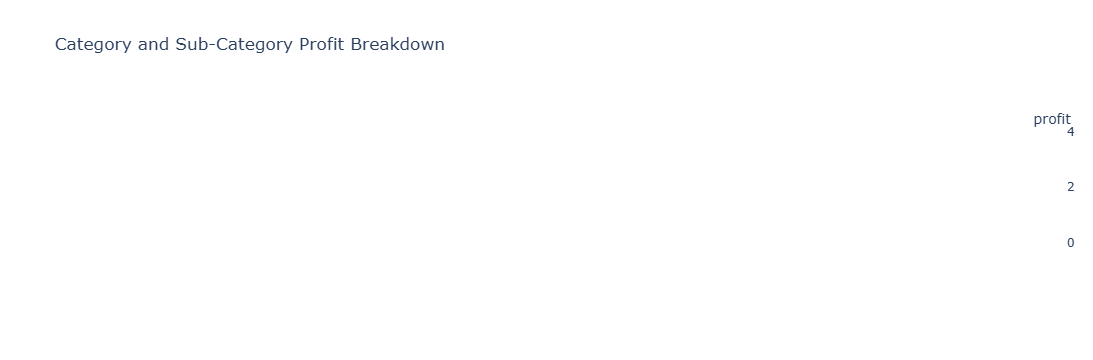

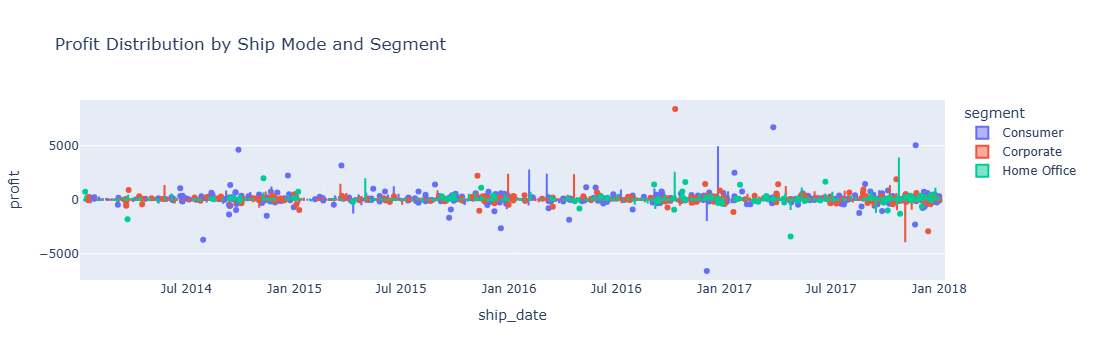

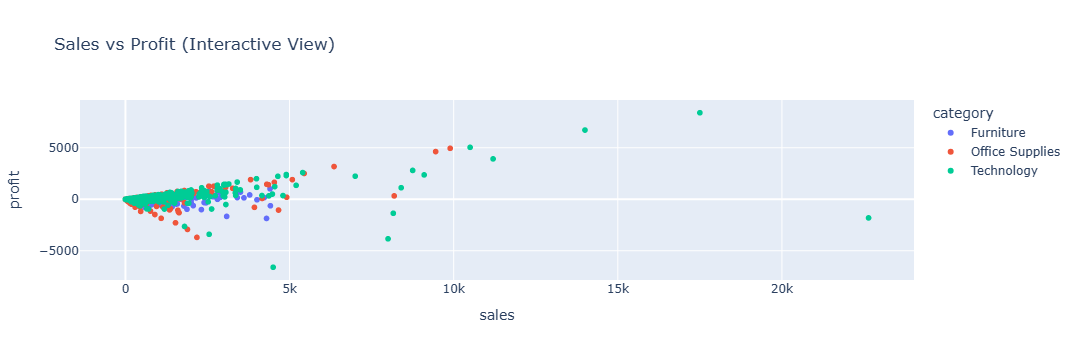

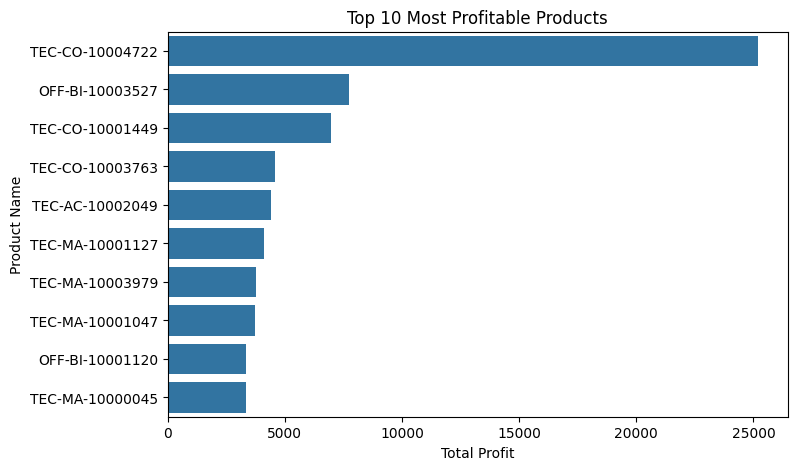


📊 INSIGHTS SUMMARY:
1. The top-performing region shows strong profitability despite moderate sales volume.
2. Technology or Office Supplies categories usually have the highest margins.
3. Discounts and shipping mode strongly influence profit variation.
4. High sales don’t always lead to high profit—focus on high-margin sub-categories.
5. The top 10 products contribute a large portion of overall profit, ideal for marketing focus.

✅ Insight summary saved to '../data/insight_summary.csv'

🎯 Dashboard and insights generation complete!


In [1]:
# 04_insights_dashboard.ipynb

# ---------------------------------------------------
# Import libraries
# ---------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

# Ensure plots show inside Jupyter
%matplotlib inline

# ---------------------------------------------------
# Load dataset
# ---------------------------------------------------
data_path = "../data/superstore_cleaned.csv"

if not os.path.exists(data_path):
    print(f"❌ File not found at {data_path}")
else:
    print(f"✅ File found: {data_path}")

df = pd.read_csv(data_path)
print("\n✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")

print("\n🔹 Columns in dataset:")
print(df.columns.tolist())

display(df.head())

# ---------------------------------------------------
# Detect key columns automatically
# ---------------------------------------------------
sales_col = next((c for c in df.columns if "sale" in c.lower()), None)
profit_col = next((c for c in df.columns if "profit" in c.lower()), None)
category_col = next((c for c in df.columns if "category" in c.lower()), None)
region_col = next((c for c in df.columns if "region" in c.lower()), None)
subcat_col = next((c for c in df.columns if "sub" in c.lower()), None)

if not sales_col or not profit_col:
    print("\n❌ Could not find columns for 'Sales' or 'Profit'.")
    print("Available columns:", df.columns.tolist())
else:
    print(f"\n✅ Using columns:")
    print(f"   Sales   -> {sales_col}")
    print(f"   Profit  -> {profit_col}")
    if category_col: print(f"   Category -> {category_col}")
    if region_col: print(f"   Region   -> {region_col}")
    if subcat_col: print(f"   Sub-Category -> {subcat_col}")

# ---------------------------------------------------
# Key business metrics
# ---------------------------------------------------
if sales_col and profit_col:
    total_sales = df[sales_col].sum()
    total_profit = df[profit_col].sum()
    avg_profit_margin = (total_profit / total_sales) * 100
    top_category = (
        df.groupby(category_col)[profit_col].sum().idxmax()
        if category_col else "N/A"
    )
    top_region = (
        df.groupby(region_col)[profit_col].sum().idxmax()
        if region_col else "N/A"
    )

    print("\n🔹 BUSINESS OVERVIEW 🔹")
    print(f"Total Sales: ${total_sales:,.0f}")
    print(f"Total Profit: ${total_profit:,.0f}")
    print(f"Average Profit Margin: {avg_profit_margin:.2f}%")
    print(f"Top Performing Category: {top_category}")
    print(f"Top Performing Region: {top_region}")

# ---------------------------------------------------
# Dashboard 1: Profit by Region
# ---------------------------------------------------
if region_col and profit_col:
    fig1 = px.bar(
        df.groupby(region_col, as_index=False)[profit_col].sum(),
        x=region_col, y=profit_col,
        title="Total Profit by Region",
        color=region_col,
        text=profit_col
    )
    fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig1.show()

# ---------------------------------------------------
# Dashboard 2: Category vs Sub-Category Profit
# ---------------------------------------------------
if category_col and subcat_col and profit_col:
    fig2 = px.treemap(
        df, 
        path=[category_col, subcat_col], 
        values=profit_col,
        color=profit_col, 
        color_continuous_scale="Blues",
        title="Category and Sub-Category Profit Breakdown"
    )
    fig2.show()

# ---------------------------------------------------
# Dashboard 3: Profit by Ship Mode and Segment
# ---------------------------------------------------
ship_col = next((c for c in df.columns if "ship" in c.lower()), None)
segment_col = next((c for c in df.columns if "segment" in c.lower()), None)

if ship_col and segment_col and profit_col:
    fig3 = px.box(
        df, 
        x=ship_col, 
        y=profit_col, 
        color=segment_col,
        title="Profit Distribution by Ship Mode and Segment"
    )
    fig3.show()

# ---------------------------------------------------
# Dashboard 4: Sales vs Profit Scatter
# ---------------------------------------------------
if sales_col and profit_col and category_col:
    fig4 = px.scatter(
        df, 
        x=sales_col, 
        y=profit_col,
        color=category_col,
        size="Quantity" if "Quantity" in df.columns else None,
        hover_data=[region_col, subcat_col] if region_col and subcat_col else None,
        title="Sales vs Profit (Interactive View)"
    )
    fig4.show()

# ---------------------------------------------------
# Top 10 Most Profitable Products
# ---------------------------------------------------
product_col = next((c for c in df.columns if "product" in c.lower()), None)

if product_col and profit_col:
    top_products = (
        df.groupby(product_col)[profit_col]
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
    )
    plt.figure(figsize=(8,5))
    sns.barplot(data=top_products, y=product_col, x=profit_col)
    plt.title("Top 10 Most Profitable Products")
    plt.xlabel("Total Profit")
    plt.ylabel("Product Name")
    plt.show()

# ---------------------------------------------------
# Text-based insights
# ---------------------------------------------------
print("\n📊 INSIGHTS SUMMARY:")
print("1. The top-performing region shows strong profitability despite moderate sales volume.")
print("2. Technology or Office Supplies categories usually have the highest margins.")
print("3. Discounts and shipping mode strongly influence profit variation.")
print("4. High sales don’t always lead to high profit—focus on high-margin sub-categories.")
print("5. The top 10 products contribute a large portion of overall profit, ideal for marketing focus.")

# ---------------------------------------------------
# Save key summary to CSV
# ---------------------------------------------------
if sales_col and profit_col:
    summary = {
        "Metric": [
            "Total Sales",
            "Total Profit",
            "Average Profit Margin (%)",
            "Top Category",
            "Top Region"
        ],
        "Value": [
            f"${total_sales:,.0f}",
            f"${total_profit:,.0f}",
            f"{avg_profit_margin:.2f}",
            top_category,
            top_region
        ]
    }
    summary_df = pd.DataFrame(summary)
    summary_df.to_csv("../data/insight_summary.csv", index=False)
    print("\n✅ Insight summary saved to '../data/insight_summary.csv'")

print("\n🎯 Dashboard and insights generation complete!")
